In [1]:
import pandas as pd
#import keras
import numpy as np

**读取数据集**

In [3]:
df = pd.read_csv('driving_log.csv')
df.columns = ['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed']
df = df[df['speed']>20]
df = df.drop(['break','speed','throttle'],axis=1)
#df['steering_angle'] = df['steering_angle']*100
df = df.reset_index(drop=True)
df

,center,left,right,steering_angle
0,IMG\center_2018_01_06_22_50_20_259.jpg,IMG\left_2018_01_06_22_50_20_259.jpg,IMG\right_2018_01_06_22_50_20_259.jpg,0.055211
1,IMG\center_2018_01_06_22_50_20_334.jpg,IMG\left_2018_01_06_22_50_20_334.jpg,IMG\right_2018_01_06_22_50_20_334.jpg,0.000000
2,IMG\center_2018_01_06_22_50_20_409.jpg,IMG\left_2018_01_06_22_50_20_409.jpg,IMG\right_2018_01_06_22_50_20_409.jpg,0.000000
3,IMG\center_2018_01_06_22_50_20_482.jpg,IMG\left_2018_01_06_22_50_20_482.jpg,IMG\right_2018_01_06_22_50_20_482.jpg,0.150000
4,IMG\center_2018_01_06_22_50_20_552.jpg,IMG\left_2018_01_06_22_50_20_552.jpg,IMG\right_2018_01_06_22_50_20_552.jpg,0.306183
5,IMG\center_2018_01_06_22_50_20_625.jpg,IMG\left_2018_01_06_22_50_20_625.jpg,IMG\right_2018_01_06_22_50_20_625.jpg,0.057973
6,IMG\center_2018_01_06_22_50_20_692.jpg,IMG\left_2018_01_06_22_50_20_692.jpg,IMG\right_2018_01_06_22_50_20_692.jpg,0.050000
7,IMG\center_2018_01_06_22_50_20_767.jpg,IMG\left_2018_01_06_22_50_20_767.jpg,IMG\right_2018_01_06_22_50_20_767.jpg,0.198029
8,IMG\center_2018_01_06_22_50_20_837.jpg,IMG\left_2018_01_06_22_50_20_837.jpg,IMG\right_2018_01_06_22_50_20_837.jpg,0.000000
9,IMG\center_2018_01_06_22_50_20_907.jpg,IMG\left_2018_01_06_22_50_20_907.jpg,IMG\right_2018_01_06_22_50_20_907.jpg,0.050000


**合并数据集**

In [5]:
df_c = df.iloc[:,[0,3]]
df_c.columns =['Imgpath','steering_angle']
df_r = df.loc[:,["right",'steering_angle']]
df_r['steering_angle'] -=0.1
df_r.columns =['Imgpath','steering_angle']
df_l =df.loc[:,["left",'steering_angle']]
df_l['steering_angle'] +=0.1
df_l.columns =['Imgpath','steering_angle']
df=pd.concat([df_c,df_r,df_l])

df.reset_index(drop=True)

,Imgpath,steering_angle
0,IMG\center_2018_01_06_22_50_20_259.jpg,0.055211
1,IMG\center_2018_01_06_22_50_20_334.jpg,0.000000
2,IMG\center_2018_01_06_22_50_20_409.jpg,0.000000
3,IMG\center_2018_01_06_22_50_20_482.jpg,0.150000
4,IMG\center_2018_01_06_22_50_20_552.jpg,0.306183
5,IMG\center_2018_01_06_22_50_20_625.jpg,0.057973
6,IMG\center_2018_01_06_22_50_20_692.jpg,0.050000
7,IMG\center_2018_01_06_22_50_20_767.jpg,0.198029
8,IMG\center_2018_01_06_22_50_20_837.jpg,0.000000
9,IMG\center_2018_01_06_22_50_20_907.jpg,0.050000


In [6]:
from sklearn.model_selection import train_test_split
df_train, df_val = train_test_split(df, test_size=0.1, random_state=0)
print(df_train.shape)
print(df_val.shape)


(36911, 2)
(4102, 2)


In [21]:
import random
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
def generator(data,batch_size=64):

    num=data.shape[0]
    while 1:
        
        data = shuffle(data)
        for offset in range(0,num,batch_size):
            image = []
            steer = []
            batch_data = data.values[offset:offset+batch_size]
            for i,imginfo in enumerate(batch_data):
                orimg = cv2.imread(imginfo[0])
                try:
                    img = cv2.cvtColor(orimg,cv2.COLOR_BGR2RGB)
                except:
                    continue
                image.append(img)
                steer.append(imginfo[1])
            X = np.array(image)
            Y = np.array(steer)
            yield (X,Y)

def Exgenerator(data,batch_size=64):

    num=data.shape[0]
    while 1:
        
        data = shuffle(data)
        for offset in range(0,num,batch_size):
            image = []
            steer = []
            batch_data = data.values[offset:offset+batch_size]
            for i,imginfo in enumerate(batch_data):
                orimg = cv2.imread(imginfo[0])
                try:
                    img = cv2.cvtColor(orimg,cv2.COLOR_BGR2RGB)
                except:
                    continue
                img =cv2.flip(img,1)
                image.append(img)
                steer.append(imginfo[1]*-1)
            X = np.array(image)
            Y = np.array(steer)
            yield (X,Y)            
        

0.1


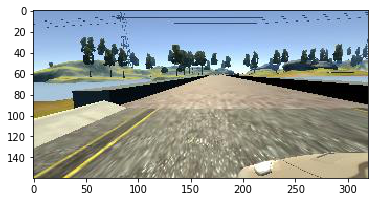

In [24]:
a,b = next(Exgenerator(df_train))
plt.imshow(a[1])
print(b[1])

In [13]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten,Lambda
from keras.layers import Conv2D,Cropping2D,MaxPooling2D
from keras.optimizers import Adam

model = Sequential()
model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3))) #normalize the data
model.add(Cropping2D(cropping=((50,20), (0,0))))
model.add(Conv2D(24,(5,5),strides=(2,2),activation="relu"))
model.add(Conv2D(36,(5,5),strides=(2,2),activation="relu"))
model.add(Conv2D(48,(5,5),strides=(2,2),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(Flatten())
model.add(Dense(512))
model.add(Dense(64))
model.add(Dense(16))
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 43, 158, 24)       1824      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 77, 36)        21636     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 37, 48)         43248     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 35, 64)         27712     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 33, 64)         36928     
__________

In [26]:
history=model.fit_generator(generator(df_train),steps_per_epoch=576,epochs=3,validation_data=generator(df_val),validation_steps=57)

Epoch 1/3
576/576 [==============================] - 100s 173ms/step - loss: 0.0118 - acc: 0.2061 - val_loss: 0.0113 - val_acc: 0.2056
Epoch 2/3
576/576 [==============================] - 99s 171ms/step - loss: 0.0108 - acc: 0.2064 - val_loss: 0.0107 - val_acc: 0.2061
Epoch 3/3
576/576 [==============================] - 96s 166ms/step - loss: 0.0102 - acc: 0.2061 - val_loss: 0.0100 - val_acc: 0.2061


In [25]:
history=model.fit_generator(Exgenerator(df_train),steps_per_epoch=576,epochs=3,validation_data=Exgenerator(df_val),validation_steps=57)

Epoch 1/3
576/576 [==============================] - 273s 474ms/step - loss: 0.0151 - acc: 0.2059 - val_loss: 0.0121 - val_acc: 0.2081
Epoch 2/3
576/576 [==============================] - 98s 170ms/step - loss: 0.0123 - acc: 0.2061 - val_loss: 0.0120 - val_acc: 0.2075
Epoch 3/3
576/576 [==============================] - 96s 167ms/step - loss: 0.0114 - acc: 0.2062 - val_loss: 0.0104 - val_acc: 0.1969


In [27]:
model.save("dml.h5")


In [14]:
from keras.models import load_model 

model =load_model("dml1.h5")



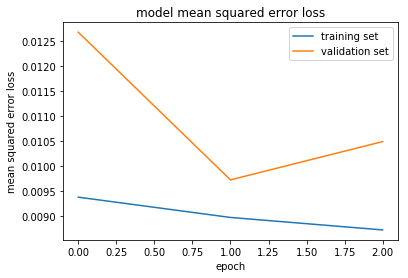

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()

In [4]:
import imageio
imageio.plugins.ffmpeg.download()

Imageio: 'ffmpeg.win32.exe' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg.win32.exe (27.4 MB)
Downloading: 8192/28781056 bytes (0.065536/28781056 bytes (0.2%327680/28781056 bytes (1.11015808/28781056 bytes (3.5%1695744/28781056 bytes (5.9%2416640/28781056 bytes (8.4%3162112/28781056 bytes (11.03956736/28781056 bytes (13.74677632/28781056 bytes (16.35414912/28781056 bytes (18.86135808/28781056 bytes (21.36799360/28781056 bytes (23.67495680/28781056 bytes (26.08265728/28781056 bytes (28.78978432/28781056 bytes (31.29666560/28781056 bytes (33.610395648/28781056 bytes (36.1%11141120/28781056 bytes (38.7%11845632/28781056 bytes (41.2%12476416/28781056 bytes (43.3%13230080/28781056 bytes (46.0%14024704/28781056 bytes (48.7%14745600/28781056 bytes (51.2%15466496/28781056 bytes (53.7%16203776/28781056 bytes (56.3%16941056/28781056 bytes (58.9%17711104/28781056 bytes (61.5%18472960/28781056 bytes (64